In [22]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from network import Network
from layer import Layer

plt.rcParams['figure.figsize'] = [10, 6]

In [23]:
df = pd.read_csv('iris.csv')
df = pd.get_dummies(df)

df

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [24]:
x = df[['sepal_length','sepal_width','petal_length','petal_width']].to_numpy().T
y = df[['species_setosa','species_versicolor','species_virginica']].to_numpy().T

In [25]:
identity = lambda x: x
d_identity = lambda x: 1

sigmoid = lambda x: 1/(1+np.exp(-x))
d_sigmoid = lambda x: sigmoid(x)*(1-sigmoid(x))

#tanh = lambda x: 2/(1+np.exp(-2*x))-1
#d_tanh = lambda x: 1-tanh(x)**2

nn =  Network(layers = [
    Layer(4, sigmoid, d_sigmoid),
    Layer(6, sigmoid, d_sigmoid),
    Layer(6, identity, d_identity),
    Layer(3, identity, d_identity)
])

nn.compile()

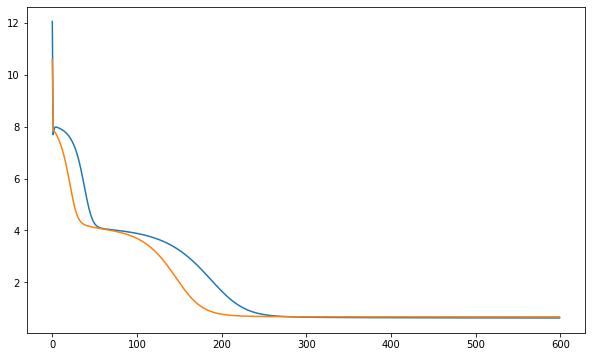

In [26]:
for lr in [0.1,0.01]:
    nn.compile()
    mse = nn.fit(x,y, epochs=600, learning_rate=0.01)
    plt.plot(mse, label = str(lr))

plt.show()

In [27]:
pd.DataFrame(nn.predict(x).T)

,0,1,2
0,1.001990,-0.001764,0.000740
1,0.986689,0.014030,-0.000577
2,0.998564,-0.002571,0.003956
3,0.987675,0.003693,0.006843
4,1.004669,-0.006861,0.002746
...,...,...,...
145,0.006813,0.003965,0.990249
146,-0.000170,0.008887,0.992835
147,0.002421,0.080481,0.917245
148,0.013723,-0.085333,1.071352
